In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
from matplotlib import rcParams
#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (8, 3)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = '#eeeeee'

C:\Users\HARSH\Anaconda3\lib\site-packages\matplotlib\__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
train = pd.read_csv('modified_train.csv', parse_dates=['Day.Index'], dayfirst=True)
test = pd.read_csv('modified_test.csv', parse_dates=['Day.Index'], dayfirst=True)
data = pd.read_csv('modified_data.csv', parse_dates=['Day.Index'], dayfirst=True)
ss = pd.read_csv('samplesubmission.csv')

In [4]:
train.head()

,Day.Index,Campaign,Impressions,Target.Clicks,Obt.Click,Min.CPC,Max.CPC,CTR,Amount.Spend,Returning.Users,...,Avg.Time.Page,Avg.Position,Total.Revenue,Obtained.Leads,Year,Month,Week,Day_Of_Week,Day,Day_Of_Year
0,2013-01-01,1,13930,225,200,28,31,1.44,6200,36,...,571,5,2401,20,2013,1,1,1,1,1
1,2013-01-02,1,11177,225,288,28,31,2.58,8352,27,...,447,3,4033,18,2013,1,1,2,2,2
2,2013-01-03,1,12968,225,211,28,31,1.63,5908,31,...,322,1,4637,13,2013,1,1,3,3,3
3,2013-01-04,1,13850,225,238,28,31,1.72,6664,38,...,534,2,3597,26,2013,1,1,4,4,4
4,2013-01-05,1,12346,225,259,28,31,2.10,7511,41,...,481,8,1923,18,2013,1,1,5,5,5


In [5]:
train.columns

Index(['Day.Index', 'Campaign', 'Impressions', 'Target.Clicks', 'Obt.Click',
       'Min.CPC', 'Max.CPC', 'CTR', 'Amount.Spend', 'Returning.Users',
       'Targeted.Leads', 'SpecialDay', 'Avg. Bounce.Rate', 'Avg.Time.Page',
       'Avg.Position', 'Total.Revenue', 'Obtained.Leads', 'Year', 'Month',
       'Week', 'Day_Of_Week', 'Day', 'Day_Of_Year'],
      dtype='object')

In [6]:
def function1(X):
    return int(round(X["Amount.Spend"]/X["Obt.Click"]))

In [7]:
# data["CPC"]=data.apply(function1,axis=1)
# train["CPC"]=train.apply(function1,axis=1)
# test["CPC"]=test.apply(function1,axis=1)

In [8]:
def prepare_data(df, is_train):
    df_month = pd.get_dummies(df['Month'], prefix='month')
    df = pd.concat([df, df_month], axis=1)
    
    df_campaign = pd.get_dummies(df['Campaign'], prefix='campaign')
    df = pd.concat([df, df_campaign], axis=1)
    
#     df_cpc = pd.get_dummies(df['CPC'], prefix='cpc')
#     df = pd.concat([df, df_cpc], axis=1)
    
#     df_min_Ctc = pd.get_dummies(df['Min.CPC'], prefix='min.CPC')
#     df = pd.concat([df, df_min_Ctc], axis=1)
    
#     df_target_clicks = pd.get_dummies(df['Target.Clicks'], prefix='clicks')
#     df = pd.concat([df, df_target_clicks], axis=1)
    
        

    

    if is_train:
        return df.drop(['Obtained.Leads','Day.Index',"Campaign","Target.Clicks"], axis=1), df['Obtained.Leads']
    return df.drop(['Day.Index',"Campaign","Target.Clicks"], axis=1)

In [9]:
train_features, train_target = prepare_data(train, 1)

In [10]:
test_features = prepare_data(test, 0)

In [11]:
train_features.columns

Index(['Impressions', 'Obt.Click', 'Min.CPC', 'Max.CPC', 'CTR', 'Amount.Spend',
       'Returning.Users', 'Targeted.Leads', 'SpecialDay', 'Avg. Bounce.Rate',
       'Avg.Time.Page', 'Avg.Position', 'Total.Revenue', 'Year', 'Month',
       'Week', 'Day_Of_Week', 'Day', 'Day_Of_Year', 'month_1', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'campaign_1',
       'campaign_2', 'campaign_3', 'campaign_4', 'campaign_5'],
      dtype='object')

In [12]:
train_features.head()

,Impressions,Obt.Click,Min.CPC,Max.CPC,CTR,Amount.Spend,Returning.Users,Targeted.Leads,SpecialDay,Avg. Bounce.Rate,...,month_8,month_9,month_10,month_11,month_12,campaign_1,campaign_2,campaign_3,campaign_4,campaign_5
0,13930,200,28,31,1.44,6200,36,15,1,70.81,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,11177,288,28,31,2.58,8352,27,20,0,32.38,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,12968,211,28,31,1.63,5908,31,14,0,99.01,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,13850,238,28,31,1.72,6664,38,16,0,43.60,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,12346,259,28,31,2.10,7511,41,18,0,23.24,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [13]:
train_target.head()

0    20
1    18
2    13
3    26
4    18
Name: Obtained.Leads, dtype: int64

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.grid_search import GridSearchCV

# Imports for model
from sklearn.metrics import mean_squared_error
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import LinearRegression

In [45]:
#Lr = GridSearchCV(LinearRegression(),cv=5, scoring='mean_squared_error')
Lr=LinearRegression()
Lr.fit(train_features, train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
#

In [46]:
predictTrain=Lr.predict(train_features)

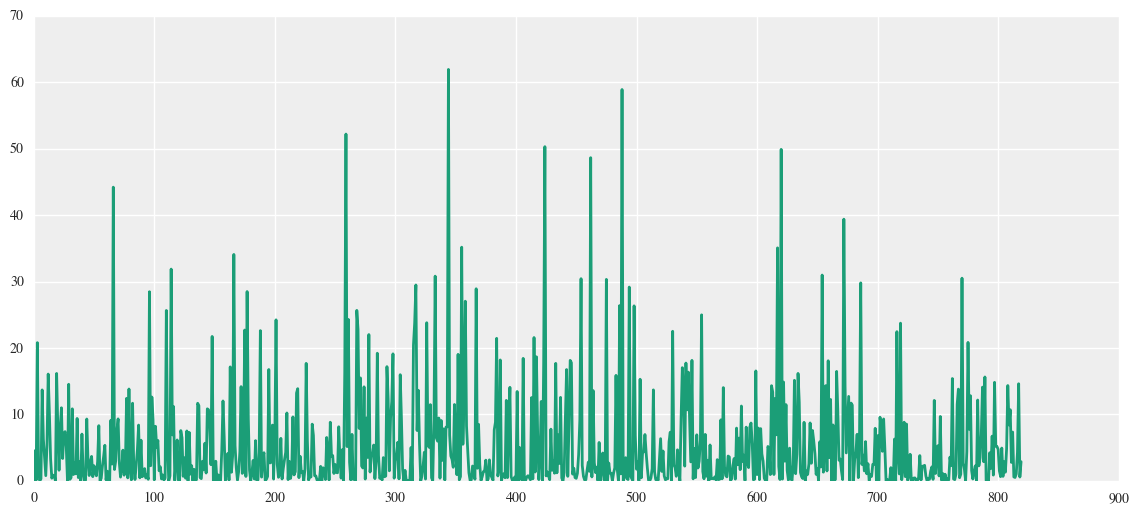

In [47]:
rcParams['figure.figsize'] = (14, 6)
plt.plot(train_features.index, (predictTrain-train_target)**2)

In [ ]:
#

In [51]:
predicted = Lr.predict(test_features)

In [52]:
predicted[0:5]

array([ 18.41501484,  11.9781827 ,   9.00267996,  10.00505151,   7.30102859])

In [53]:
predicted = np.round(predicted, decimals=0).astype(int)
predicted[0:5]

array([18, 12,  9, 10,  7])

In [54]:
solution = pd.DataFrame(ss['Day.Index'])

In [55]:
solution = pd.concat([solution, pd.DataFrame(predicted, columns=['Obtained.Leads'])], axis=1)

In [89]:
solution.head()

,Day.Index,Obtained.Leads
0,01-04-2015,17.0
1,02-04-2015,13.0
2,03-04-2015,8.0
3,04-04-2015,9.0
4,05-04-2015,7.0


In [57]:
path='C:\\Users\\HARSH\\Desktop\\Data_Tales\\Submit\\'
solution.to_csv(path+r'Linear.csv', index=False)

In [59]:
#Ensembling

In [60]:
xgb = pd.read_csv(path+'solution1.csv')

In [61]:
xgb.head()

,Day.Index,Obtained.Leads
0,01-04-2015,17
1,02-04-2015,13
2,03-04-2015,8
3,04-04-2015,9
4,05-04-2015,7


In [67]:
solution["XGB."]=xgb["Obtained.Leads"]

In [73]:
def func(X):
    return (.2*X["Obtained.Leads"]+.8*X["XGB."])
solution["A"]=solution.apply(func,axis=1)

In [82]:
solution.head()

,Day.Index,Obtained.Leads
0,01-04-2015,17.2
1,02-04-2015,12.8
2,03-04-2015,8.2
3,04-04-2015,9.2
4,05-04-2015,7.0


In [81]:
del solution["A"]

In [79]:
solution["Obtained.Leads"]=solution["A"]

In [86]:
solution["Obtained.Leads"]=np.round(solution["Obtained.Leads"])

In [87]:
solution.head()

,Day.Index,Obtained.Leads
0,01-04-2015,17.0
1,02-04-2015,13.0
2,03-04-2015,8.0
3,04-04-2015,9.0
4,05-04-2015,7.0


In [88]:
path='C:\\Users\\HARSH\\Desktop\\Data_Tales\\Submit\\'
solution.to_csv(path+r'Ensembling.csv', index=False)

In [58]:
#no